In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
cwd = os.getcwd()
file_name= 'Solar Energy.csv'
file_path = cwd + "\\" + file_name
file_path

'C:\\Users\\Asus\\Desktop\\Solar project 2\\Solar Energy.csv'

In [3]:
df = pd.read_csv(file_path, encoding='latin1')
df.head(7)

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
5,12/31/2023,SDG-66270,12/28/2023,Con Ed,Bronx,Bronx,10471.0,CENY-BX,Sherman_Creek,1104,Trinity Solar,NM,13.34,11.40,15657,NaN,1
6,12/31/2023,SDG-66256,12/28/2023,Con Ed,Bronx,Bronx,10465.0,CENY-BX,Parkchester_1,7672,MOMENTUM SOLAR,NM,4.41,3.77,5178,NaN,1


In [4]:
df.shape

(218115, 17)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip,218019.0,11751.734473,962.129108,10001.00,11220.00,11717.00,12018.00,14905.0
Estimated PV System Size (kWdc),218115.0,24.507977,291.525394,0.01,5.27,7.13,10.24,43470.0
PV System Size (kWac),218115.0,19.065451,211.419642,0.01,4.50,6.09,8.75,31500.0
Estimated Annual PV Energy Production (kWh),218115.0,28768.278592,342204.175266,14.00,6180.00,8364.00,12017.00,51026825.0
Energy Storage System Size (kWac),4091.0,32.174727,296.161116,0.35,5.00,7.60,10.00,5000.0
Number of Projects,218115.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Division,Substation,Circuit ID,Developer,Metering Method
count,218115,218112,218115,218115,218057,218115,132881,138171,218085,207565,217652
unique,1,218077,5411,7,3009,62,109,2255,6429,2567,6
top,12/31/2023,LDG-00037,2/11/2016,PSEGLI,STATEN ISLAND,Suffolk,CENY-Q,Jamaica,JA NWK,Vivint Solar,NM
freq,218115,2,313,85110,6884,51715,21813,11581,1015,12822,215192


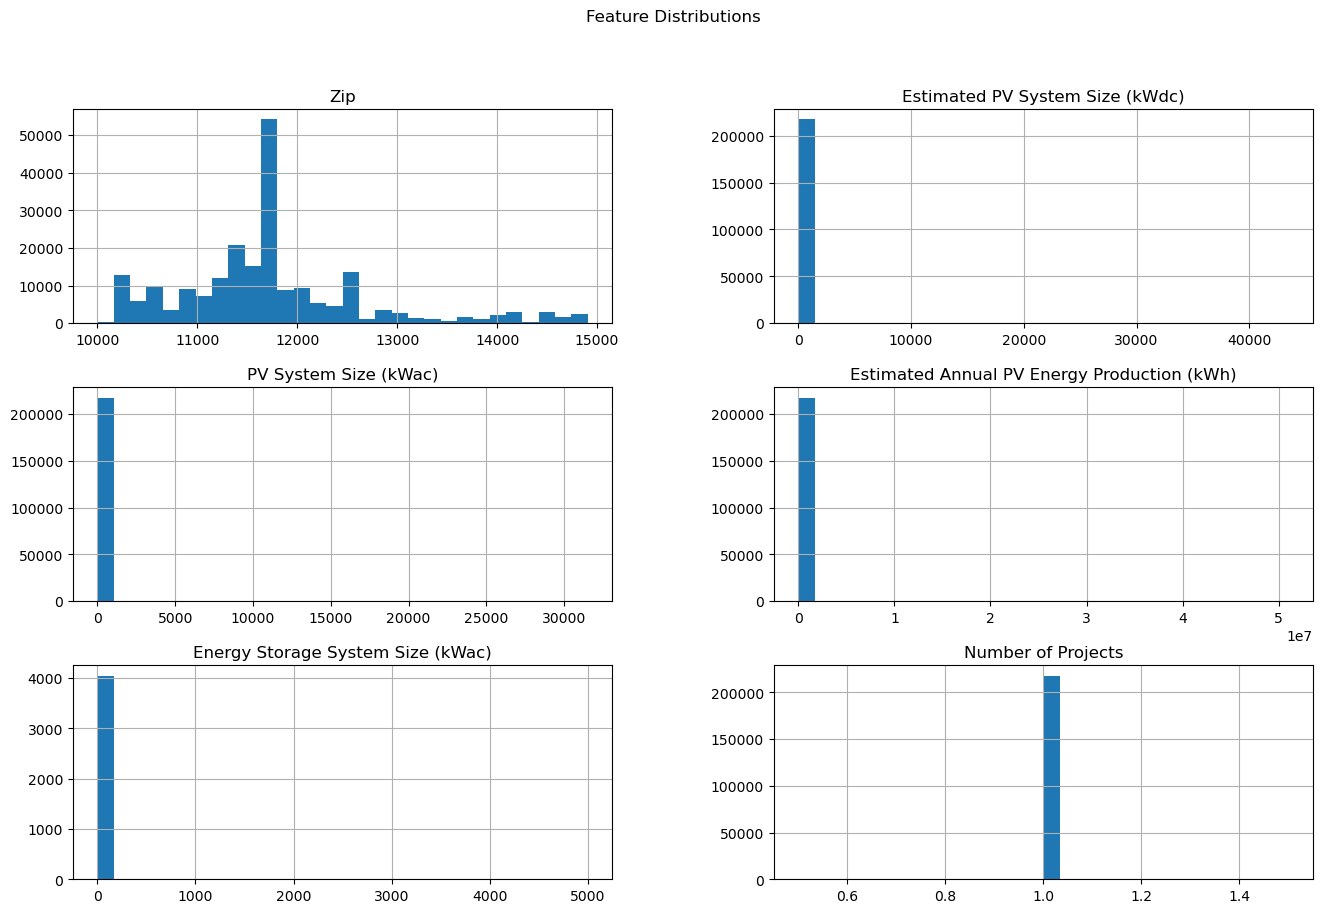

In [8]:
#1. Check Distribution of Features
df.hist(figsize=(16, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [9]:
# 2. Checking for missing values
def check_missing_values(df):
    print("Missing Values:\n")
    print(df.isnull().sum())
    print("\nPercentage of Missing Values:\n")
    print(df.isnull().mean() * 100)

check_missing_values(df)

Missing Values:

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

Percentage of Missing Values:

Data Through Date   

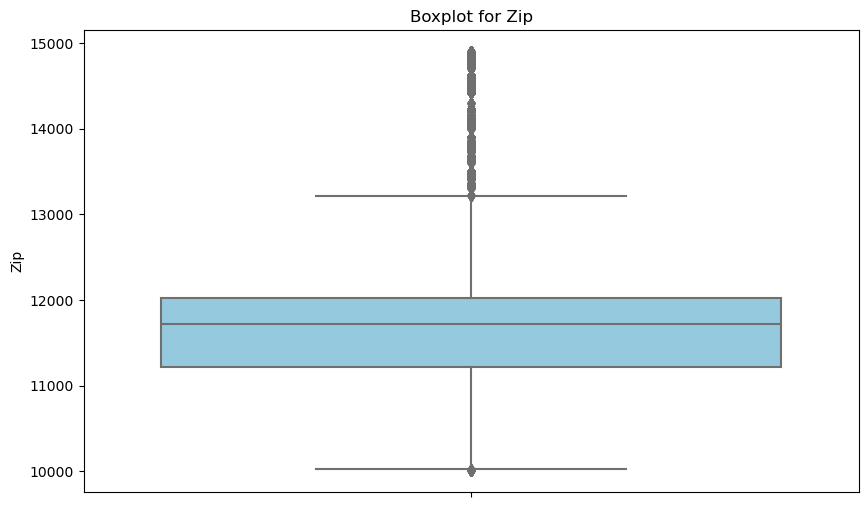

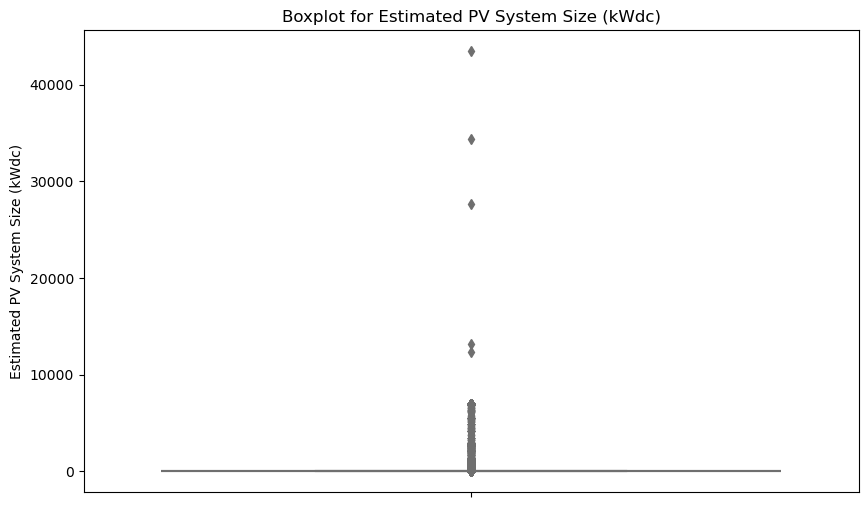

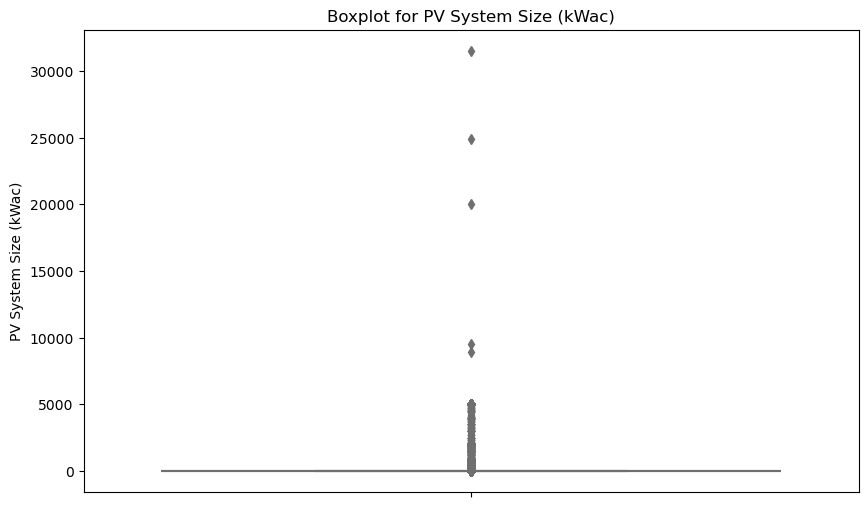

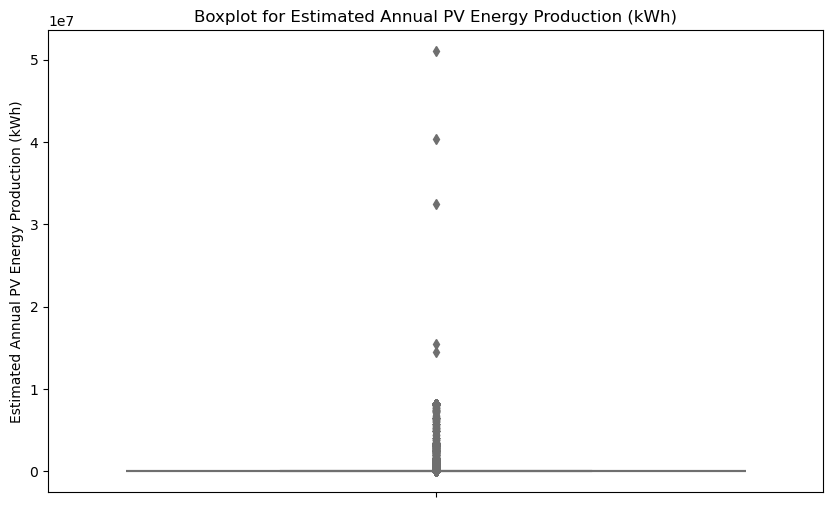

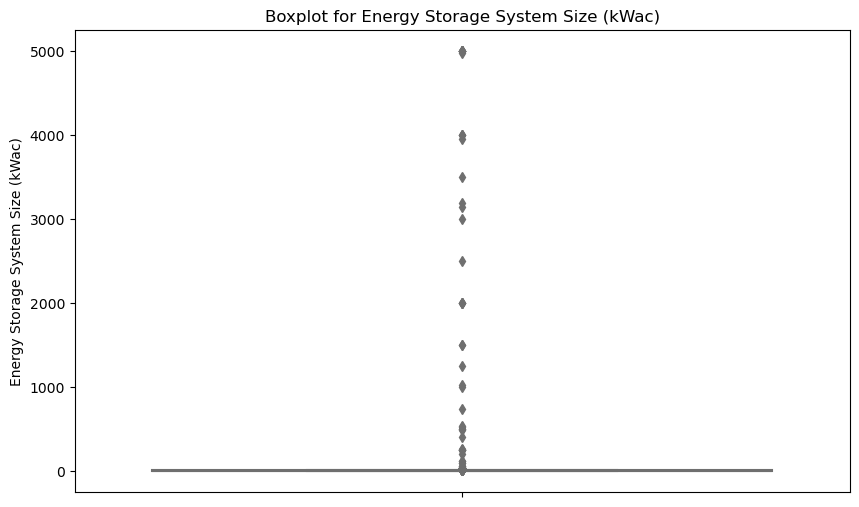

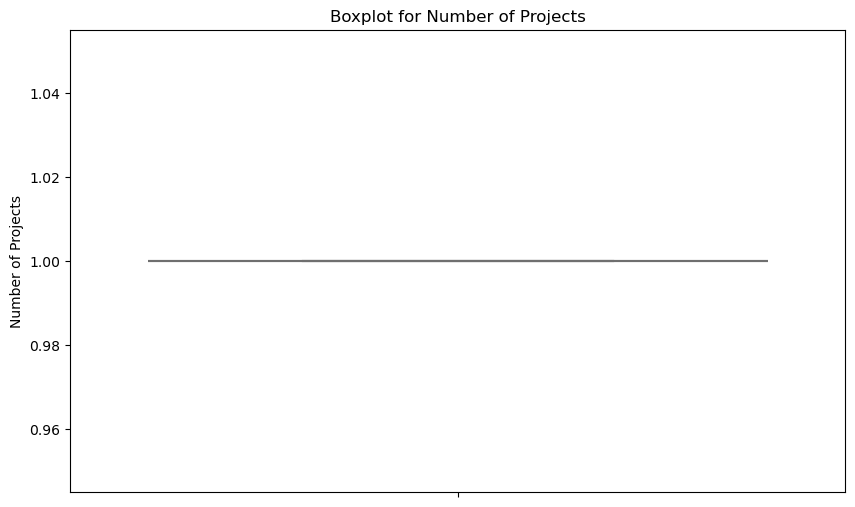


Outliers Summary:

Zip: 17010 outliers
Estimated PV System Size (kWdc): 12837 outliers
PV System Size (kWac): 12837 outliers
Estimated Annual PV Energy Production (kWh): 12837 outliers
Energy Storage System Size (kWac): 236 outliers
Number of Projects: 0 outliers


In [10]:
# 3.1 Visualizing outliers using boxplots
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, y=col, color='skyblue')
        plt.title(f'Boxplot for {col}')
        plt.ylabel(col)
        plt.show()

# 3.2 Checking for outliers using the IQR method
def check_outliers(df):
    print("\nOutliers Summary:\n")
    numerical_cols  = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        q1          = df[col].quantile(0.25)
        q3          = df[col].quantile(0.75)
        iqr         = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers    = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers")
        
# Call the function
plot_boxplots(df)
check_outliers(df)

In [11]:
# Drop columns with very high missing values
df.drop(columns=['Division', 'Substation', 'Energy Storage System Size (kWac)'], inplace=True)

# Drop rows with missing essential features (Developer, Metering Method)
df.dropna(subset=['Developer', 'Metering Method'], inplace=True)

# Fill missing ZIPs with mode
df['Zip'] = df['Zip'].fillna(df['Zip'].mode()[0])

# Fill missing City/Town with mode
df['City/Town'] = df['City/Town'].fillna(df['City/Town'].mode()[0])

# Drop rows where numeric system size values are 0 or null
df = df[(df['Estimated PV System Size (kWdc)'] > 0) & 
        (df['PV System Size (kWac)'] > 0) & 
        (df['Estimated Annual PV Energy Production (kWh)'] > 0)]

In [12]:
# Convert dates to datetime
df['Interconnection Date'] = pd.to_datetime(df['Interconnection Date'], errors='coerce')
df['Data Through Date'] = pd.to_datetime(df['Data Through Date'], errors='coerce')

# Extract year of interconnection
df['Interconnection Year'] = df['Interconnection Date'].dt.year

# Efficiency
df['System Efficiency'] = df['PV System Size (kWac)'] / df['Estimated PV System Size (kWdc)']


In [13]:
categorical_cols = ['Utility', 'City/Town', 'County', 'Zip', 'Developer', 'Metering Method']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [14]:
# Define clean feature set without possibly leaky features
X = df[[
    'Utility', 'City/Town', 'County', 'Zip', 'Developer', 'Metering Method',
    'Interconnection Year'  # Only location and categorical info
]]

y = df['Estimated Annual PV Energy Production (kWh)']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

In [16]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 14966.622369421588
RMSE: 164027.33627936742
R2 Score: 0.7366359312289585


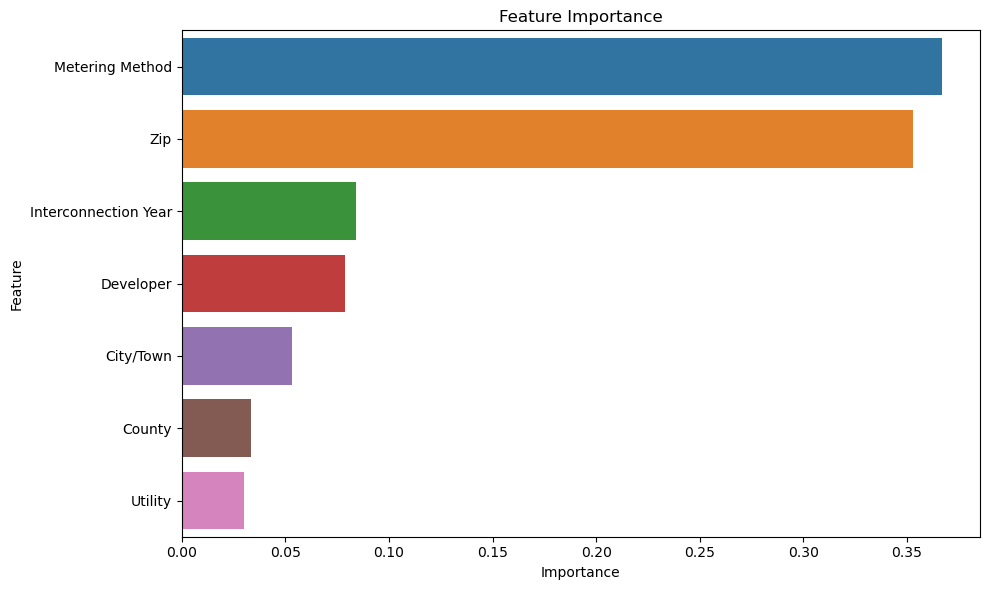

In [17]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


<h3>Exploratory Analysis</h3>

- Found that system size strongly correlates with energy production.
- Certain developers and regions consistently produce more energy.
- Noticed risk of data leakage from size-related fields like kWdc and kWac.

<h3>Final Chosen Model: Without size features</h3>

    MAE ≈ 14,966 kWh

    RMSE ≈ 164,027 kWh

    R² ≈ 0.736

- This means the model can explain about 73.6% of the variation in annual solar energy production using just location, developer, utility, and project metadata.


<h3>Conclusion</h3>

We successfully built a robust, leakage-free model to predict annual solar energy production.
- The model helps in:
    1. Selecting high-performing developers
    2. Identifying productive regions or ZIP codes
    3. Supporting investment and project planning decisions


- The model lays the foundation for:
    1. Smarter energy forecasting
    2. Faster feasibility analysis
    3. Customer decision support tools

<h2>The model predicted:</h2>
<h4><b>Estimated Annual PV Energy Production (in kilowatt-hours) for a solar installation before it’s built or connected to the grid, based on details like:</b></h4>

- Location (City, County, ZIP)
- Developer
- Utility
- Metering Method
- Interconnection Year

It did not rely on direct system size inputs (kWdc, kWac) in the final model — making it a generalizable, unbiased estimator.


<h3>What Does That Mean in Real Terms?</h3>

Imagine a solar developer is planning to install a new system in a city like Queens, NY, using Kamtech Solar Solutions as the developer and Net Metering.

<b>Before installing or finalizing the project, they can now estimate:
    "This setup will likely generate around 7,000 kWh/year."</b>

And they can get this estimate just from project metadata — no hardware installed yet!


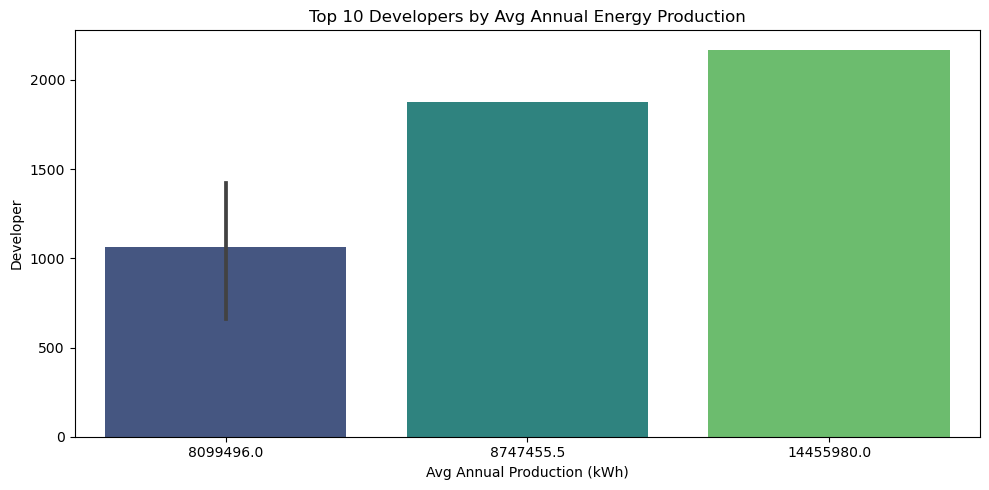

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Developer-wise Average Production ---
dev_avg = df.groupby('Developer')['Estimated Annual PV Energy Production (kWh)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=dev_avg.values, y=dev_avg.index, palette='viridis')
plt.title('Top 10 Developers by Avg Annual Energy Production')
plt.xlabel('Avg Annual Production (kWh)')
plt.ylabel('Developer')
plt.tight_layout()
plt.show()

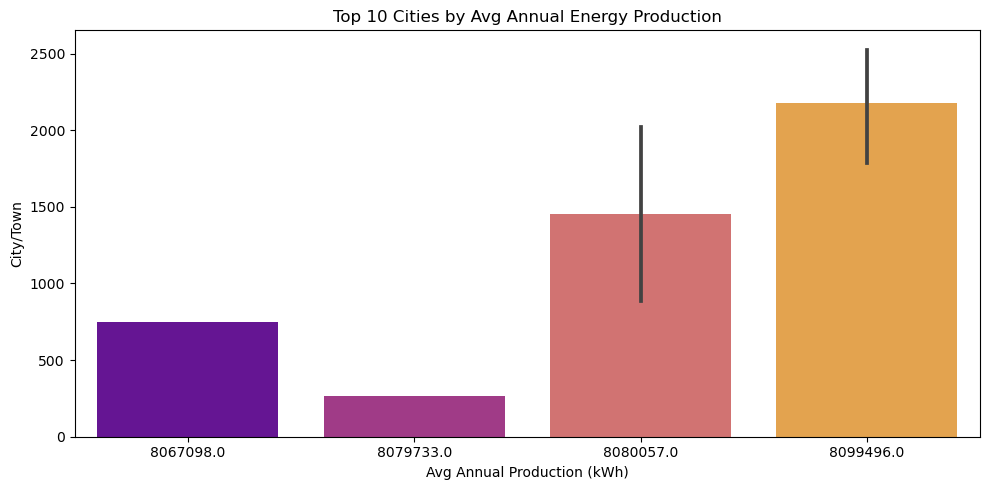

In [19]:
# --- City-wise Average Production ---
city_avg = df.groupby('City/Town')['Estimated Annual PV Energy Production (kWh)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=city_avg.values, y=city_avg.index, palette='plasma')
plt.title('Top 10 Cities by Avg Annual Energy Production')
plt.xlabel('Avg Annual Production (kWh)')
plt.ylabel('City/Town')
plt.tight_layout()
plt.show()


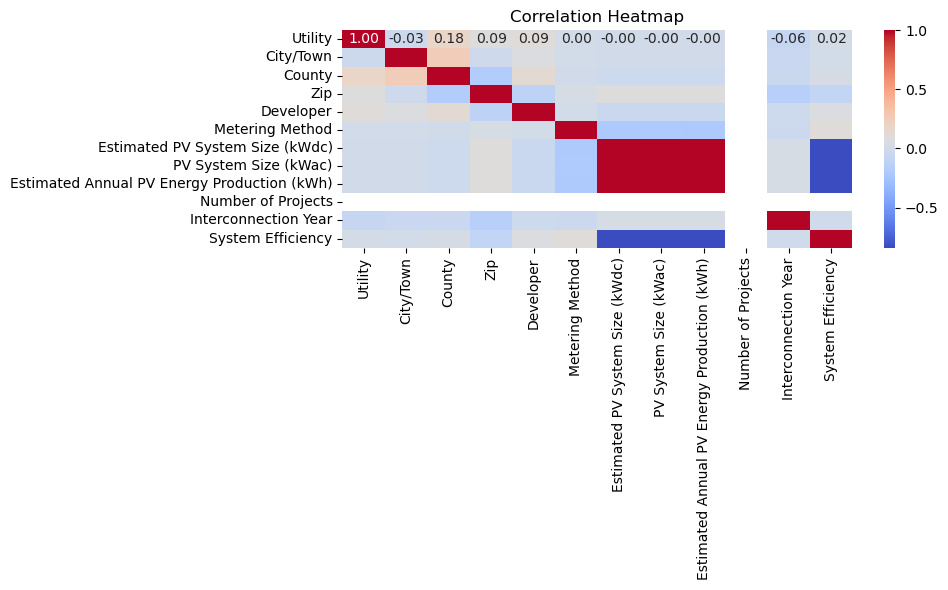

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


<h1>1. Energy Production by ZIP Code (Top 10)</h1>

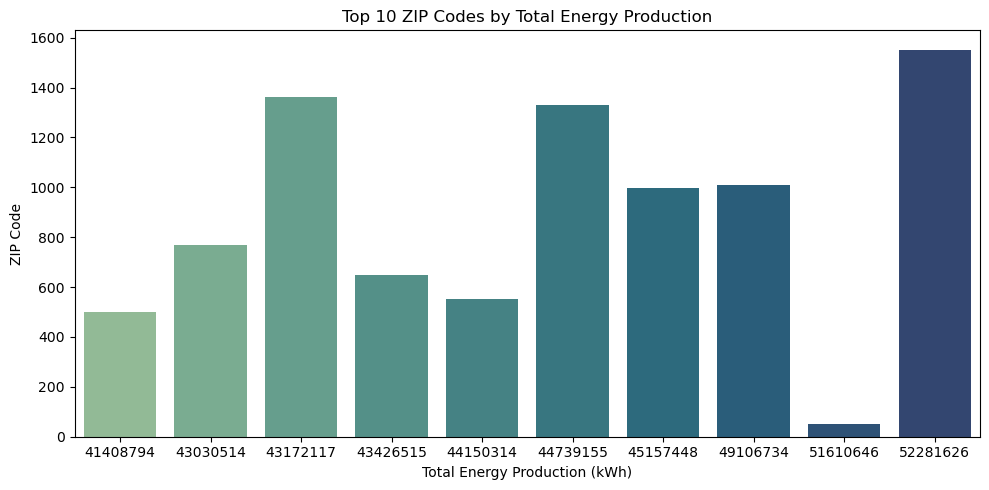

In [21]:
zip_prod = df.groupby('Zip')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=zip_prod.values, y=zip_prod.index, palette='crest')
plt.title("Top 10 ZIP Codes by Total Energy Production")
plt.xlabel("Total Energy Production (kWh)")
plt.ylabel("ZIP Code")
plt.tight_layout()
plt.show()


<h1>2. Developer-wise Total Energy Production</h1>

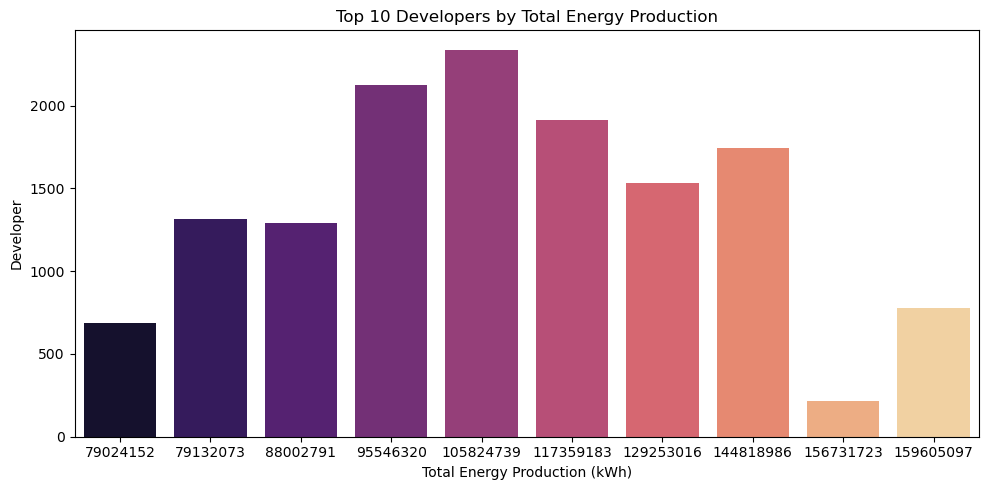

In [26]:
dev_total = df.groupby('Developer')['Estimated Annual PV Energy Production (kWh)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=dev_total.values, y=dev_total.index, palette='magma')
plt.title("Top 10 Developers by Total Energy Production")
plt.xlabel("Total Energy Production (kWh)")
plt.ylabel("Developer")
plt.tight_layout()
plt.show()


<h1>3. Actual vs Predicted Energy (From Final Model)</h1>

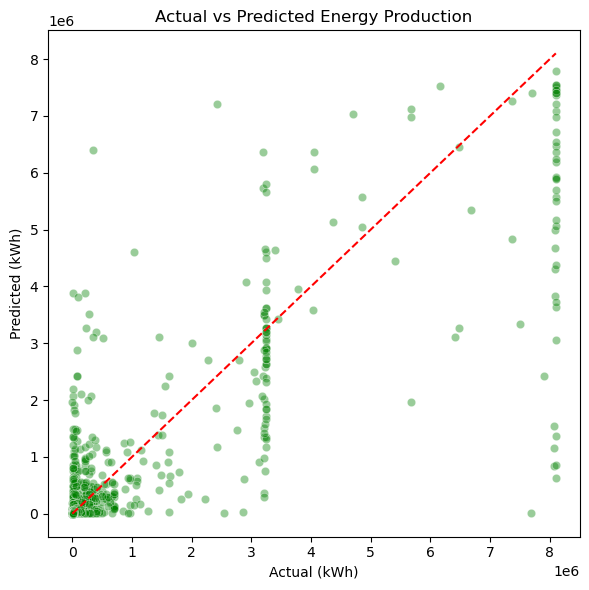

In [25]:
# Use predictions from your final model
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Energy Production")
plt.xlabel("Actual (kWh)")
plt.ylabel("Predicted (kWh)")
plt.tight_layout()
plt.show()


<h1>4. Distribution of Energy Production</h1>

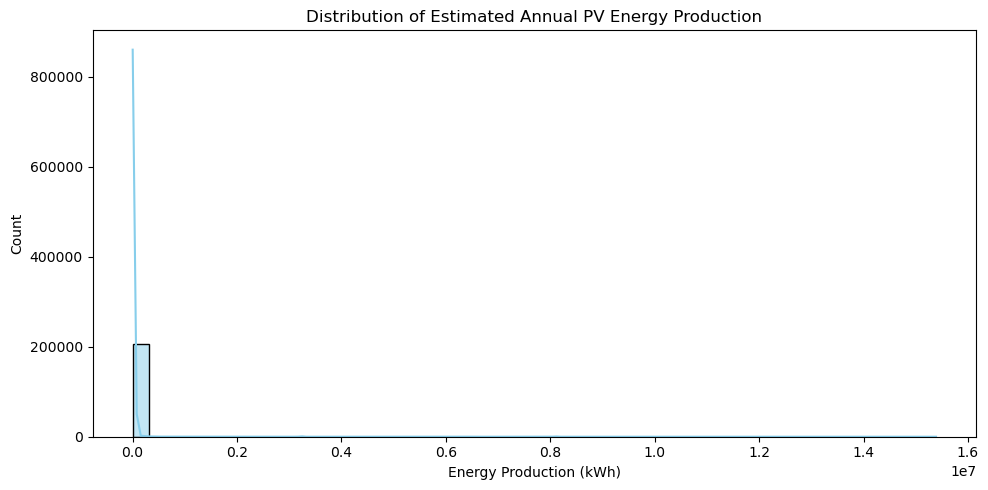

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['Estimated Annual PV Energy Production (kWh)'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Estimated Annual PV Energy Production")
plt.xlabel("Energy Production (kWh)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
